__Table of Content__

1. Library Import
2. Data Import
3. Data Wrangling
4. Code
5. Visualisation

## 1. Library Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid",{'axes.axisbelow': False,'grid.color': 'w','axes.spines.bottom': False, 'axes.spines.left': False, 'axes.spines.right': False,
 'axes.spines.top': False})
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, widgets, Layout
import geopandas as gpd

## 2. Data Import

In [3]:
data = pd.read_csv("master.csv")
# Import Geopandas World Dataset to map countries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

## 3. Data Wrangling

In [4]:
# Make the name of the countries consistent across both datasets
country_mapping = {"Bosnia and Herzegovina":"Bosnia and Herz.", "Czech Republic":"Czech Rep.", 
                   "Dominica":"Dominican Rep.", "Russian Federation":"Russia"}
data["country"] = data["country"].map(country_mapping).fillna(data["country"])

## 4. Code

In [16]:
def mapRatesByYear(year):
    fig, ax = plt.subplots(figsize = (18, 8))
    # Data prep
    data_pivot_total = pd.pivot_table(data[data["year"] == year], 
                                      index = "country", values = "suicides/100k pop", 
                                      aggfunc = "sum", fill_value = 0)
    world_subplot = world.merge(data_pivot_total, left_on = "name", right_on = "country", 
                                how = "left").fillna( value = 0)
    # Plot
    world_subplot.plot(ax = ax, column = "suicides/100k pop", legend = True, cmap = "YlGn", edgecolor = "0.8")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Year: " + str(year), fontsize = 20, loc = "left")
    
    # comments display
    print("Top 5 countries")
    top5 = data_pivot_total.sort_values(by = "suicides/100k pop" , ascending = False)[:5]
    i = 1
    for c, v in zip(top5.index, top5["suicides/100k pop"].values):
        print(str(i) + ". " + str(c) + " - " + str(int(v)))
        i += 1
    plt.show()
    
#Interactive
mapByYear = interactive(mapRatesByYear, year = widgets.IntSlider(min = 1985, max = 2015, step = 3, value = 10))

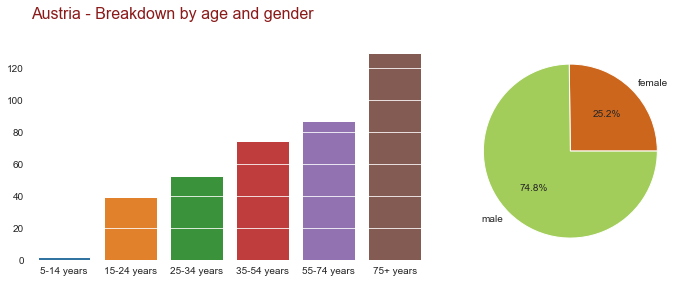

In [17]:
def plotBarPie(year, country):
    fig = plt.figure(figsize = (12, 4))
    # Use grid to give 3/5 space to the bar plot and 2/5 space to pie chart
    grid = plt.GridSpec(1, 5, wspace = 0.1, hspace = 0.5)
    # Filter data
    subset = data[(data["year"] == year) & ( data["country"] == country)]
    # Check for emptry data
    if len(subset) == 0:
        print("No data available")
    else:
        # Bar plot
        ax1 = plt.subplot(grid[0, :3])
        # Data prep
        data_pivot_age = pd.pivot_table(subset, index = "country", columns = "age", 
                                        values = "suicides/100k pop", aggfunc = "sum", fill_value = 0)
        # Sort the age groups to be presented in its logical order along the x-axis
        sort_key = np.argsort([int(i.replace("+", "-").split("-")[0]) for i in data["age"].unique()])
        sorted_age_group = [data["age"].unique()[i] for i in sort_key]
        # plot
        sns.barplot(data = data_pivot_age, order = sorted_age_group)
        ax1.set_xlabel("")
        ax1.set_title(str(country) + " - Breakdown by age and gender \n", fontsize = 16, loc = "left", color = "#8B1A1A")
        
        # Pie Chart
        ax2 = plt.subplot(grid[0, 3:])
        # Data prep
        data_pivot_gender = pd.pivot_table(subset, index = "country", 
                                           columns = "sex", values = "suicides/100k pop", 
                                           aggfunc = "sum", fill_value = 0)
        # plot
        ax2.pie(data_pivot_gender.values[0], labels = data_pivot_gender.columns, 
                autopct = "%1.1f%%", colors = ["#CD661D", "#A2CD5A"])
    plt.show()

# Interactive
# Extract top 20 countries by suicide rates to present in the dropdown
data_pivot_total = pd.pivot_table(data, index = "country", 
                                        values = "suicides/100k pop", aggfunc = "sum", fill_value = 0)
top_20_countries = data_pivot_total.sort_values(by = "suicides/100k pop" , ascending = False)[:20].index.tolist()
# Initiate the slider
year_slider = widgets.IntSlider(min = 1985, max = 2015, step = 5, value = 10, 
                                layout = Layout(width = "98%"))
# Initiate the dropdown
country_dropdown = widgets.Dropdown(
    options = sorted(top_20_countries),
    description = "country",
    disabled = False, layout = Layout(width = "99%")
)
out = widgets.interactive_output(plotBarPie, {'year': year_slider, 'country': country_dropdown})

## 5. Visualization

Vis. 1 - Use the slider to explore how the suicide rates (suicides/100k pop) by country change through time (every 3 year interval) between 1985 and 2015.
<br>
Vis. 2 - Choose the country to use the slider to explore the breakdown of suicide rates by age and gender. 

Top 5 countries
1. Sri Lanka - 558
2. Suriname - 470
3. Austria - 384
4. Singapore - 353
5. France - 348


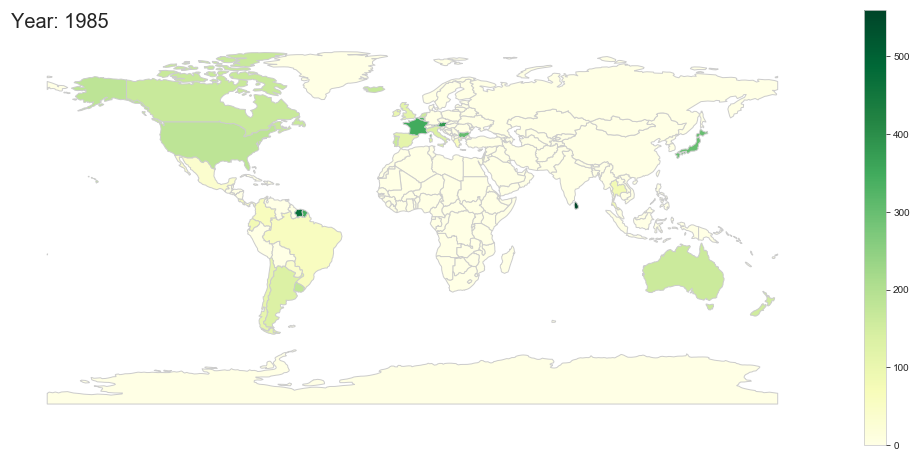

In [18]:
mapByYear

**Comments**
<br>
 - Before the dissolution of Soviet Union in 1991, there were no much data on the suicide rates for Soviet Union Countries
 - Before 1991 Sri Lanka and Suriname had the highest suicide rates
 - From 1991 we can see most of the Soviet Countries (Russia, Latvia, Lithuania, Hungary, Estonia) maintain the highest suicide rates up until 2006
 - Post 2006 Korea has the highest suicide rates

In [15]:
widgets.HBox([widgets.VBox([year_slider, country_dropdown]), out])

**Comments**
<br>
- In Russian most suicides are performed by males (mostly more than 80%)
- Japan see higher rate of female suicides than Russia (around 30%)
- Japan suicide rates among younger people are raising, wheres in Russia these are dropping
- Singapore saw one of the highest suicide rates among women (43%) during 1990s.
- Finland has proportionaly high suicide rates across all age groups


* Overall, there is more male suicides compared to female
* Suicide rates rise with age group.